# AIN313 - Machine Learning Course Project
# Student Name: Emirhan Utku , Student ID: 2210765029
# Student Name: Süleyman Yolcu , Student ID: 2210765016
# Date: November 10 , 2024
---


## Preprocessing Steps for injuries_2010-2020.csv

*When we examine our dataset, we need to understand which part of the body is injured from the 'Notes' column for the project we will do, but since information such as 'placed IL' does not provide us with any information, we removed the rows that have this information in this preprocessing stage.*

### Step 1: Filter Rows with Injury-Related Notes

In this step, we will filter out rows in our dataset based on the `Notes` column. We aim to:

1. Remove rows where the `Notes` column does not mention injuries.
2. Exclude rows that indicate activation, return, or other non-injury-related activities.

In [5]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import CountVectorizer


In [6]:
injuries_df = pd.read_csv('injuries_2010-2020.csv')
injuries_df.head(100)

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)
...,...,...,...,...,...
95,2010-10-28,Magic,NaN,Daniel Orton,placed on IL
96,2010-10-28,Magic,NaN,Malik Allen,placed on IL
97,2010-10-28,Spurs,NaN,Matt Bonner,sprained right ankle (DTD)
98,2010-10-28,Wizards,NaN,Gilbert Arenas,placed on IL with sprained right ankle


In [7]:
non_injury_keywords = ['activated', 'returned', 'lineup', 'cleared', 'ready']

injuries_df = injuries_df[
    ~injuries_df['Notes'].str.contains('|'.join(non_injury_keywords), case=False, na=False)
]

**Remove rows where Notes exactly say vague entries like 'placed on IL'**

In [9]:
def is_vague_il_entry(note):
    note = note.lower()
    return note.strip() in ['placed on il', 'placed on inactive']

injuries_df = injuries_df[
    ~injuries_df['Notes'].apply(is_vague_il_entry)
]

In [10]:
display(injuries_df.head(100))

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)
...,...,...,...,...,...
202,2010-11-06,Raptors,NaN,Sonny Weems,placed on IL with ankle injury
204,2010-11-06,Rockets,NaN,Kyle Lowry,placed on IL with sore back
205,2010-11-06,Rockets,NaN,Yao Ming,placed on IL with foot injury / rest
209,2010-11-07,76ers,NaN,Andre Iguodala,placed on IL with right Achilles tendon injury


### Step 2: Extracting Injury Types

In this step, we will perform the following actions:

1. **Define a list of common injury-related keywords**:
   - Create a predefined list of keywords related to injuries (e.g., "fracture," "sprain," "laceration," etc.).

2. **Scan the Notes column of the filtered dataset**:
   - Examine the `Notes` column of the dataset for any matches with the defined keywords.

3. **Extract matches and create a new column**:
   - Add a new column to the dataset named `Injury_Type` to store the extracted keywords.


In [12]:
injury_keywords = [
    'knee', 'shoulder', 'hip', 'ankle', 'elbow', 'foot', 'heel', 'hand',
    'hamstring', 'back', 'groin', 'neck', 'head', 'wrist', 'calf', 'leg',
    'concussion', 'achilles', 'thigh', 'tibia', 'toe', 'adductor', 'chest',
    'nose', 'forearm', 'gluteus', 'eye', 'patella', 'quadricap', 'rib',
    'shin', 'pelvis', 'kneecap', 'orbital', 'thumb', 'spinal cord',
    'tailbone', 'cervical', 'cornea', 'cheekbone', 'collarbone', 'jaw',
    'flexor', 'forehead', 'fibula', 'oral', 'facial', 'abdominal',
    'abdomen', 'heart', 'throat', 'quadricep', 'oblique', 'finger',
    'hernia', 'abductor', 'tricep', 'bicep', 'lat', 'lung', 'face',
    'biceps', 'triceps', 'pectoral', 'plantar', 'disc'
]

def extract_injury_type(notes, keywords):
    injuries = [keyword for keyword in keywords if keyword in notes.lower()]

    return ', '.join(injuries)

injuries_df['Injury_Type'] = injuries_df['Notes'].apply(
    lambda x: extract_injury_type(x, injury_keywords)
)
injuries_df['Injury_Type'] = injuries_df['Injury_Type'].apply(
    lambda x: 'Other' if x == '' else x
)

display(injuries_df.head(100))

,Date,Team,Acquired,Relinquished,Notes,Injury_Type
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,finger
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely),achilles
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,foot
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely),knee
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),back
...,...,...,...,...,...,...
202,2010-11-06,Raptors,NaN,Sonny Weems,placed on IL with ankle injury,ankle
204,2010-11-06,Rockets,NaN,Kyle Lowry,placed on IL with sore back,back
205,2010-11-06,Rockets,NaN,Yao Ming,placed on IL with foot injury / rest,foot
209,2010-11-07,76ers,NaN,Andre Iguodala,placed on IL with right Achilles tendon injury,achilles


In [13]:
injuries_df['Injury_Type'].value_counts()

Injury_Type
knee                              2499
ankle                             2117
Other                             2092
back                               922
hamstring                          636
                                  ... 
shoulder, ankle                      1
foot, hamstring                      1
back, wrist                          1
neck, concussion, hernia, disc       1
shoulder, neck                       1
Name: count, Length: 182, dtype: int64

### Step 3: Classifying Injury Severity

In this step, we will classify injuries based on severity using the following approach:

1. **Identify severity indicators**:
   - Search for phrases such as "out indefinitely" or "out for season" in the `Notes` column to indicate severe injuries.

2. **Create a new column**:
   - Add a column named `Out_Indefinitely` with values:
     - `1` for severe injuries (indicated by the presence of severity phrases).
     - `0` for less serious injuries.

In [15]:
severity_keywords = ['out indefinitely', 'out for season']

injuries_df['Out_Indefinitely'] = injuries_df['Notes'].str.contains(
    '|'.join(severity_keywords), case=False, na=False
).astype(int)

In [16]:
injuries_df.head(100)

,Date,Team,Acquired,Relinquished,Notes,Injury_Type,Out_Indefinitely
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,finger,1
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely),achilles,1
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,foot,1
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely),knee,1
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),back,1
...,...,...,...,...,...,...,...
202,2010-11-06,Raptors,NaN,Sonny Weems,placed on IL with ankle injury,ankle,0
204,2010-11-06,Rockets,NaN,Kyle Lowry,placed on IL with sore back,back,0
205,2010-11-06,Rockets,NaN,Yao Ming,placed on IL with foot injury / rest,foot,0
209,2010-11-07,76ers,NaN,Andre Iguodala,placed on IL with right Achilles tendon injury,achilles,0


### Step 4: Categorizing Injuries into Broader Body Part Categories

In this step, we will categorize injuries into broader body part categories. This additional step enhances exploratory analysis and modeling by providing higher-level insights into injury trends.

#### Benefits of Categorization:
1. **Summarize Insights**:
   - Allows easier analysis of trends in injuries across different body parts.
2. **Improve Modeling**:
   - Reduces noise from overly granular injury types, enabling models to identify broader patterns.

#### Implementation Steps:

1. **Define Body Part Categories**:
   - Group injuries into categories such as "Head", "Upper Body", "Lower Body", etc.
   - Map specific injury-related keywords to these categories.

2. **Create a Mapping Function**:
   - Use a function to assign injuries from the `Injury_Type` column to the defined body part categories.

3. **Add a New Column**:
   - Create a new column named `Body_Part_Category` to store the broader injury category for each row.
  

In [18]:
def categorize_injury(injury):
    if injury in ['hand', 'wrist', 'thumb', 'finger']:
        return 'Hand'
    elif injury in ['facial', 'jaw', 'cheekbone', 'orbital', 'nose', 'eye', 'oral', 'cornea', 'forehead', 'throat', 'face']:
        return 'Facial'
    elif injury in ['back', 'spinal cord', 'tailbone']:
        return 'Back'
    elif injury in ['leg', 'thigh', 'tibia', 'shin', 'quadricep', 'hamstring', 'knee', 'patella', 'kneecap', 'calf', 'achilles', 'adductor', 'fibula', 'ankle']:
        return 'Leg'
    elif injury in ['plantar', 'foot', 'heel', 'toe']:
        return 'Foot'
    elif injury in ['forearm', 'elbow', 'arm', 'tricep', 'bicep', 'biceps', 'triceps', 'flexor']:
        return 'Arm'
    elif injury in ['shoulder', 'chest', 'collarbone', 'rib', 'abdominal', 'abdomen', 'heart', 'lung', 'pectoral', 'disc']:
        return 'Upper Body'
    elif injury in ['hip', 'groin', 'pelvis', 'gluteus', 'quadricap']:
        return 'Lower Body'
    elif injury in ['head', 'concussion', 'neck', 'cervical']:
        return 'Head'
    else:
        return 'Others'


injuries_df['Body_Part'] = injuries_df['Injury_Type'].apply(
    lambda x: categorize_injury(x.split(', ')[0]) if x != 'Other' else 'Others'
)




In [19]:
injuries_df.head(100)

,Date,Team,Acquired,Relinquished,Notes,Injury_Type,Out_Indefinitely,Body_Part
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,finger,1,Hand
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely),achilles,1,Leg
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,foot,1,Foot
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely),knee,1,Leg
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),back,1,Back
...,...,...,...,...,...,...,...,...
202,2010-11-06,Raptors,NaN,Sonny Weems,placed on IL with ankle injury,ankle,0,Leg
204,2010-11-06,Rockets,NaN,Kyle Lowry,placed on IL with sore back,back,0,Back
205,2010-11-06,Rockets,NaN,Yao Ming,placed on IL with foot injury / rest,foot,0,Foot
209,2010-11-07,76ers,NaN,Andre Iguodala,placed on IL with right Achilles tendon injury,achilles,0,Leg


In [20]:
injuries_df['Body_Part'].value_counts()

Body_Part
Leg           6842
Others        2145
Foot          1025
Back           953
Lower Body     826
Hand           795
Upper Body     751
Head           446
Arm            201
Facial         186
Name: count, dtype: int64

### Step 5: Categorizing Injuries into Broader Body Part Categories

In this step, we will categorize injuries into broader body part categories. This additional step enhances exploratory analysis and modeling by providing higher-level insights into injury trends.

#### Benefits of Categorization:
1. **Summarize Insights**:
   - Allows easier analysis of trends in injuries across different body parts.
2. **Improve Modeling**:
   - Reduces noise from overly granular injury types, enabling models to identify broader patterns.

#### Implementation Steps:

1. **Define Body Part Categories**:
   - Group injuries into categories such as "Head", "Upper Body", "Lower Body", etc.
   - Map specific injury-related keywords to these categories.

2. **Create a Mapping Function**:
   - Use a function to assign injuries from the `Injury_Type` column to the defined body part categories.

3. **Add a New Column**:
   - Create a new column named `Body_Part_Category` to store the broader injury category for each row.




In [22]:
injuries_df['Date'] = pd.to_datetime(injuries_df['Date'], errors='coerce')


def categorize_season(date):
    seasons = [
        ('10-11', pd.Timestamp('2010-10-03'), pd.Timestamp('2011-12-24')),
        ('11-12', pd.Timestamp('2011-12-25'), pd.Timestamp('2012-10-29')),
        ('12-13', pd.Timestamp('2012-10-30'), pd.Timestamp('2013-10-28')),
        ('13-14', pd.Timestamp('2013-10-29'), pd.Timestamp('2014-10-27')),
        ('14-15', pd.Timestamp('2014-10-28'), pd.Timestamp('2015-10-26')),
        ('15-16', pd.Timestamp('2015-10-27'), pd.Timestamp('2016-10-24')),
        ('16-17', pd.Timestamp('2016-10-25'), pd.Timestamp('2017-10-16')),
        ('17-18', pd.Timestamp('2017-10-17'), pd.Timestamp('2018-10-15')),
        ('18-19', pd.Timestamp('2018-10-16'), pd.Timestamp('2019-10-21')),
        ('19-20', pd.Timestamp('2019-10-22'), pd.Timestamp('2020-12-21')),
        ('20-21', pd.Timestamp('2020-12-22'), pd.Timestamp('2021-10-18'))
    ]


    for season, start, end in seasons:
        if start <= date <= end:
            return season


    return None


injuries_df['Season'] = injuries_df['Date'].apply(categorize_season)



In [23]:
injuries_df.head(100)

,Date,Team,Acquired,Relinquished,Notes,Injury_Type,Out_Indefinitely,Body_Part,Season
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,finger,1,Hand,10-11
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely),achilles,1,Leg,10-11
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,foot,1,Foot,10-11
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely),knee,1,Leg,10-11
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),back,1,Back,10-11
...,...,...,...,...,...,...,...,...,...
202,2010-11-06,Raptors,NaN,Sonny Weems,placed on IL with ankle injury,ankle,0,Leg,10-11
204,2010-11-06,Rockets,NaN,Kyle Lowry,placed on IL with sore back,back,0,Back,10-11
205,2010-11-06,Rockets,NaN,Yao Ming,placed on IL with foot injury / rest,foot,0,Foot,10-11
209,2010-11-07,76ers,NaN,Andre Iguodala,placed on IL with right Achilles tendon injury,achilles,0,Leg,10-11


## Understanding Preprocessed 'injuries_2010-2020.csv' Data

## Word Cloud and Bar Chart Analysis

### Key Findings:

1. **Word Cloud Observations**:
   - Words like "right," "left," "placed," and "on" dominate the word cloud. These are commonly used in descriptions of injuries or player status updates (e.g., "placed on IL with right knee strain").
   - Injury-specific terms such as "knee," "ankle," "sore," "strained," "foot," and "injury" are prominent, emphasizing the dataset's injury-focused nature.
   - Contextual words like "indefinitely," "DNP" (Did Not Play), and "season" stand out, reflecting injury severity and game impact.

2. **General Observations**:
   - Generic terms like "on," "with," and "placed" contribute to the word count but offer limited insights. Removing such words (stopwords) in future iterations would make the visualization more meaningful.
   - The prominence of specific injury-related terms (e.g., "ankle," "sprained," "knee") aligns with the dataset's focus and provides a clear understanding of frequent injuries.

---

### Bar Chart of Top 20 Most Common Words:

   - The most frequent words include "on," "placed," "left," and "right," reflecting the descriptive language in the dataset.
   - Specific injury-related terms such as "knee," "ankle," "sprained," and "strained" are among the top terms, showing their prevalence in the data.
   - Words like "DNP" (Did Not Play) and "out" highlight the focus on player absences and severity classification.



---



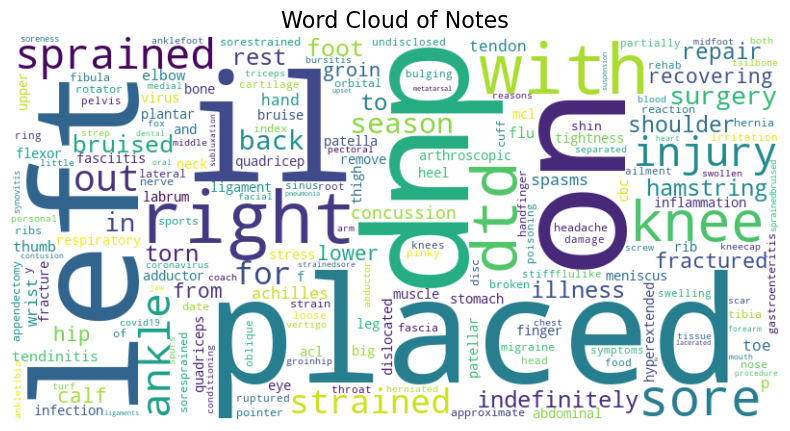

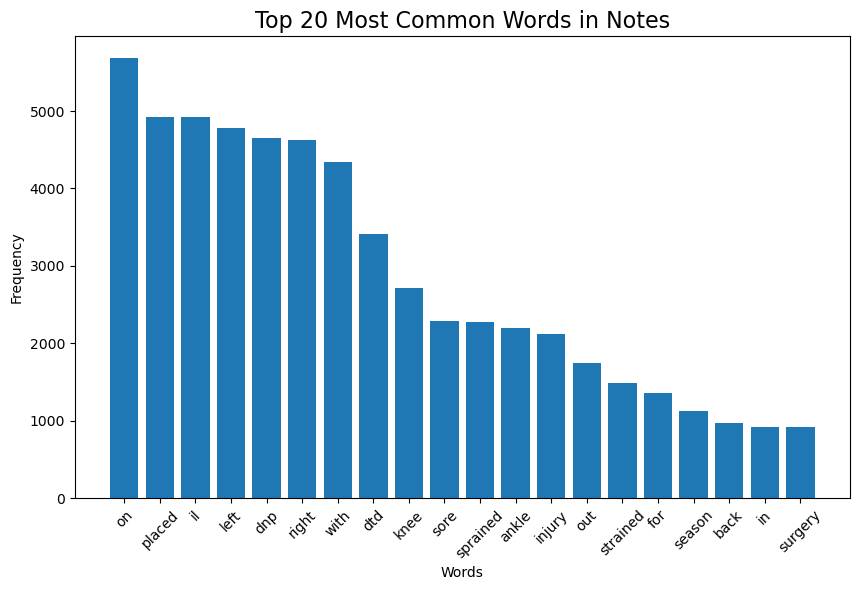

In [26]:
notes = injuries_df['Notes']

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text.split()

all_words = [word for note in notes for word in preprocess_text(note)]

word_counts = Counter(all_words)

most_common_words = word_counts.most_common(20)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Notes', fontsize=16)
plt.show()

common_words, frequencies = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(common_words, frequencies)
plt.title('Top 20 Most Common Words in Notes', fontsize=16)
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.show()


### Comments on N-Gram Analysis Results

#### Bigram Analysis

The bigram analysis highlights frequent procedural phrases like "placed il" and "activated il," which dominate the dataset but contribute little to injury analysis. In contrast, injury-specific bigrams such as "left knee," "right ankle," and "sprained left" emphasize injury localization and severity. Terms like "returned lineup" appear as status updates and could be filtered out to refine the focus.

Excluding procedural phrases and concentrating on injury-specific bigrams would provide actionable insights, such as identifying common injury patterns and localizations.

#### Trigram Analysis

The trigram analysis provides more detailed descriptions, with phrases like "sprained left ankle" and "right knee dnp" showing both injury types and their impact on gameplay. However, procedural phrases like "placed il sore" still dominate, reducing the focus on injuries.

Filtering out procedural trigrams and focusing on injury-related ones (e.g., "sprained left ankle") would enhance the analysis, enabling a deeper understanding of specific injuries and their correlation with gameplay metrics.

#### General Observations

While n-gram analysis effectively captures patterns like injury types, procedural phrases like "placed il" add noise. Implementing domain-specific filters to exclude these terms would improve relevance. Grouping related n-grams (e.g., ankle injuries) could help identify trends and correlations with other factors, such as workload or season timing.

Focusing on actionable n-grams, such as "sprained left ankle," can enhance predictive modeling and injury prevention strategies, making the analysis more impactful for practical applications.


In [28]:
def get_top_ngrams(corpus, ngram_range=(2, 2), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    ngram_counts = X.sum(axis=0).A1
    ngram_features = vectorizer.get_feature_names_out()
    ngram_frequencies = dict(zip(ngram_features, ngram_counts))
    return Counter(ngram_frequencies).most_common(top_n)


common_bigrams = get_top_ngrams(notes, ngram_range=(2, 2), top_n=20)

common_trigrams = get_top_ngrams(notes, ngram_range=(3, 3), top_n=20)

common_bigrams, common_trigrams


([('placed il', 4914),
  ('left knee', 1286),
  ('right knee', 1180),
  ('left ankle', 1168),
  ('sprained left', 1145),
  ('sprained right', 1009),
  ('sore left', 954),
  ('right ankle', 888),
  ('sore right', 870),
  ('il sore', 783),
  ('il sprained', 762),
  ('ankle dnp', 709),
  ('strained left', 648),
  ('injury dtd', 624),
  ('knee dnp', 606),
  ('strained right', 584),
  ('knee injury', 465),
  ('il strained', 460),
  ('ankle dtd', 457),
  ('injury dnp', 434)],
 [('sprained left ankle', 888),
  ('placed il sore', 783),
  ('placed il sprained', 762),
  ('sprained right ankle', 624),
  ('placed il strained', 460),
  ('left ankle dnp', 447),
  ('sore left knee', 435),
  ('sore right knee', 381),
  ('il sprained left', 356),
  ('il sprained right', 335),
  ('left knee dnp', 302),
  ('il sore left', 298),
  ('il sore right', 298),
  ('right knee dnp', 296),
  ('placed il illness', 288),
  ('placed il right', 276),
  ('placed il left', 261),
  ('placed il bruised', 255),
  ('right a

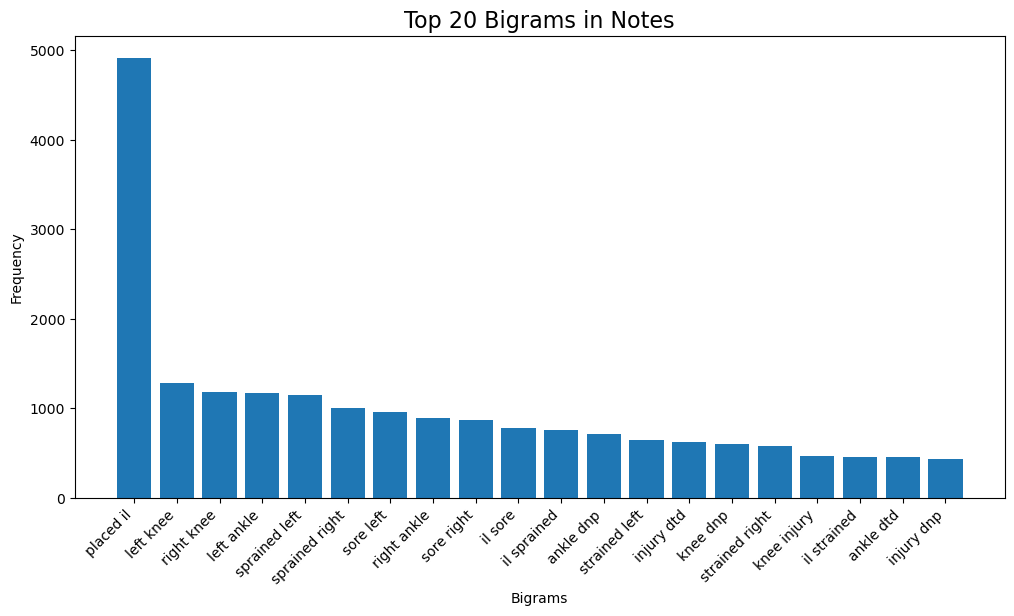

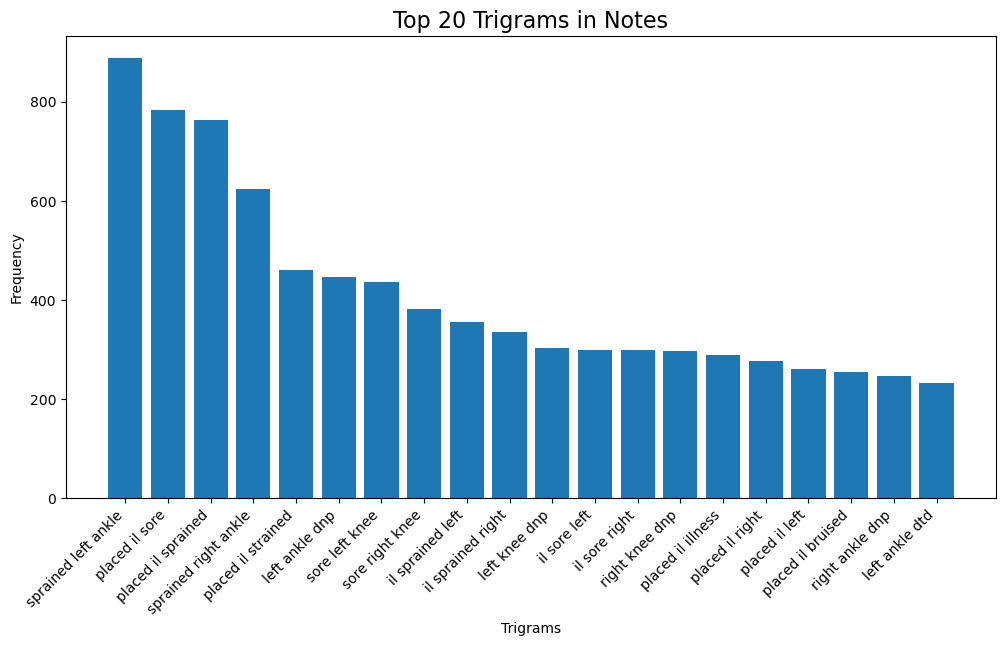

In [29]:
bigrams, bigram_freqs = zip(*common_bigrams)
trigrams, trigram_freqs = zip(*common_trigrams)

plt.figure(figsize=(12, 6))
plt.bar(bigrams, bigram_freqs)
plt.title('Top 20 Bigrams in Notes', fontsize=16)
plt.ylabel('Frequency')
plt.xlabel('Bigrams')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(trigrams, trigram_freqs)
plt.title('Top 20 Trigrams in Notes', fontsize=16)
plt.ylabel('Frequency')
plt.xlabel('Trigrams')
plt.xticks(rotation=45, ha='right')
plt.show()

In [54]:
# Filter the injuries dataset for seasons 2013-2020 and prepare for merging with in-game stats data
injuries_df = injuries_df[injuries_df['Season'].notna() & ~injuries_df['Season'].isin(['10-11', '11-12', '12-13'])].copy()


In [56]:
stats_df = pd.read_csv('stats_2013-2023.csv')
stats_df.head()

,PLAYER_ID,PLAYER_NAME,SEASON,SEASON_NUM,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,GP,MIN,USG_PCT,...,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES,TEAM,INJURED ON,RETURNED,DAYS MISSED,INJURED_TYPE
0,1630639,A.J. Lawson,22-23,22.5,22.0,78,179,13,4.8,0.182,...,1.39,0.62,0.0,0.0,0.2,NaN,NaN,NaN,NaN,NaN
1,1631260,AJ Green,22-23,22.5,23.0,77,190,32,9.4,0.160,...,2.61,1.84,0.1,0.0,0.3,NaN,NaN,NaN,NaN,NaN
2,1631100,AJ Griffin,22-23,22.5,19.0,78,220,66,19.4,0.174,...,2.08,1.49,0.4,0.0,0.7,NaN,NaN,NaN,NaN,NaN
3,203932,Aaron Gordon,22-23,22.5,27.0,80,235,61,30.1,0.206,...,2.94,2.11,1.8,2.1,6.8,Nuggets,2023-02-02,2023-02-07,5.0,Sprained_ankle
4,1628988,Aaron Holiday,22-23,22.5,26.0,72,185,57,13.7,0.128,...,4.17,3.82,0.1,0.0,0.4,NaN,NaN,NaN,NaN,NaN


In [58]:
# Filter out unwanted seasons from df_gamestats
stats_df = stats_df[~stats_df['SEASON'].isin(['20-21', '21-22', '22-23', '23-24'])].copy()


In [60]:
stats_df

,PLAYER_ID,PLAYER_NAME,SEASON,SEASON_NUM,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,GP,MIN,USG_PCT,...,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES,TEAM,INJURED ON,RETURNED,DAYS MISSED,INJURED_TYPE
1851,203932,Aaron Gordon,19-20,19.5,24.0,80,235,62,32.5,0.205,...,2.88,1.91,1.8,3.2,4.3,NaN,NaN,NaN,NaN,NaN
1852,1628988,Aaron Holiday,19-20,19.5,23.0,72,185,66,24.5,0.182,...,4.35,4.17,0.1,0.0,0.3,NaN,NaN,NaN,NaN,NaN
1853,1627846,Abdel Nader,19-20,19.5,26.0,77,225,55,15.8,0.164,...,2.05,1.41,0.2,0.0,0.4,Thunder,2020-01-15,2020-01-29,14.0,Sprained_ankle
1854,1629690,Adam Mokoka,19-20,19.5,21.0,77,190,11,10.2,0.110,...,1.47,0.83,0.2,0.0,0.8,NaN,NaN,NaN,NaN,NaN
1855,1629678,Admiral Schofield,19-20,19.5,23.0,77,241,33,11.2,0.118,...,1.40,0.51,0.2,0.2,0.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,2584,Willie Green,13-14,13.5,32.0,75,201,55,15.8,0.162,...,2.44,1.84,0.5,0.1,0.5,NaN,NaN,NaN,NaN,NaN
5574,201163,Wilson Chandler,13-14,13.5,27.0,80,225,62,31.1,0.193,...,2.33,1.26,1.4,1.0,1.7,NaN,NaN,NaN,NaN,NaN
5575,202333,Xavier Henry,13-14,13.5,23.0,78,220,43,21.1,0.223,...,3.24,2.45,0.9,0.1,1.2,NaN,NaN,NaN,NaN,NaN
5576,2216,Zach Randolph,13-14,13.5,32.0,81,260,79,34.2,0.258,...,2.15,0.81,3.6,17.3,9.5,NaN,NaN,NaN,NaN,NaN


In [66]:
# We merged the datasets by left join the player in-game stats table
# using player names, seasons, and teams as unique keys
merged_df = pd.merge(stats_df, injuries_df, how = 'left', left_on=['PLAYER_NAME', 'SEASON', 'TEAM'], right_on=['Relinquished', 'Season', 'Team'])


In [78]:
merged_df.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'SEASON', 'SEASON_NUM', 'AGE',
       'PLAYER_HEIGHT_INCHES', 'PLAYER_WEIGHT', 'GP', 'MIN', 'USG_PCT', 'PACE',
       'POSS', 'FGA_PG', 'DRIVES', 'DRIVE_FGA', 'DRIVE_PASSES', 'DIST_MILES',
       'AVG_SPEED', 'PULL_UP_FGA', 'PULL_UP_FG3A', 'TOUCHES',
       'FRONT_CT_TOUCHES', 'AVG_SEC_PER_TOUCH', 'AVG_DRIB_PER_TOUCH',
       'ELBOW_TOUCHES', 'POST_TOUCHES', 'PAINT_TOUCHES', 'TEAM', 'INJURED ON',
       'RETURNED', 'DAYS MISSED', 'INJURED_TYPE', 'Date', 'Team', 'Acquired',
       'Relinquished', 'Notes', 'Injury_Type', 'Out_Indefinitely', 'Body_Part',
       'Season'],
      dtype='object')

In [82]:
# Clean the merged_df by dropping duplicated entry
merged_df_cleaned = merged_df.drop_duplicates(subset = ['SEASON_NUM', 'Injury_Type', 'Out_Indefinitely', 'PLAYER_NAME', 'Team'])
merged_df_cleaned

,PLAYER_ID,PLAYER_NAME,SEASON,SEASON_NUM,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,GP,MIN,USG_PCT,...,INJURED_TYPE,Date,Team,Acquired,Relinquished,Notes,Injury_Type,Out_Indefinitely,Body_Part,Season
0,203932,Aaron Gordon,19-20,19.5,24.0,80,235,62,32.5,0.205,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1628988,Aaron Holiday,19-20,19.5,23.0,72,185,66,24.5,0.182,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1627846,Abdel Nader,19-20,19.5,26.0,77,225,55,15.8,0.164,...,Sprained_ankle,2020-01-14,Thunder,NaN,Abdel Nader,sprained left ankle (DTD),ankle,0.0,Leg,19-20
4,1627846,Abdel Nader,19-20,19.5,26.0,77,225,55,15.8,0.164,...,Sprained_ankle,2020-08-14,Thunder,NaN,Abdel Nader,placed on IL with neck injury,neck,0.0,Head,19-20
5,1629690,Adam Mokoka,19-20,19.5,21.0,77,190,11,10.2,0.110,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,2584,Willie Green,13-14,13.5,32.0,75,201,55,15.8,0.162,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6142,201163,Wilson Chandler,13-14,13.5,27.0,80,225,62,31.1,0.193,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6143,202333,Xavier Henry,13-14,13.5,23.0,78,220,43,21.1,0.223,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6144,2216,Zach Randolph,13-14,13.5,32.0,81,260,79,34.2,0.258,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
clean_list = ['PLAYER_ID', 'Acquired', 'Relinquished']
merged_df_cleaned = merged_df_cleaned.drop(columns = clean_list, index = 1)

In [86]:
merged_df_cleaned.columns

Index(['PLAYER_NAME', 'SEASON', 'SEASON_NUM', 'AGE', 'PLAYER_HEIGHT_INCHES',
       'PLAYER_WEIGHT', 'GP', 'MIN', 'USG_PCT', 'PACE', 'POSS', 'FGA_PG',
       'DRIVES', 'DRIVE_FGA', 'DRIVE_PASSES', 'DIST_MILES', 'AVG_SPEED',
       'PULL_UP_FGA', 'PULL_UP_FG3A', 'TOUCHES', 'FRONT_CT_TOUCHES',
       'AVG_SEC_PER_TOUCH', 'AVG_DRIB_PER_TOUCH', 'ELBOW_TOUCHES',
       'POST_TOUCHES', 'PAINT_TOUCHES', 'TEAM', 'INJURED ON', 'RETURNED',
       'DAYS MISSED', 'INJURED_TYPE', 'Date', 'Team', 'Notes', 'Injury_Type',
       'Out_Indefinitely', 'Body_Part', 'Season'],
      dtype='object')

In [88]:
merged_df_cleaned.shape

(4273, 38)